# Tabular Playground Series - Feb 2022

Importación de librerías a utilizar

In [1]:
import zipfile
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Generación de DataFrame
### Primero descargo la información directo desde la API de Kaggle, la descomprimo y borro el zip original

In [2]:
# conda install -c conda-forge kaggle

Si no se tiene instalado kaggle, descomentar la celda de arriba y correrla. Luego entrar a la consola y correr $kaggle$. Esto creará la carpeta .kaggle en C:\Users\user\, donde se debe copiar el arcivo token (.json) que se obtiene de la subsección API en Account dentro del usuario propio de kaggle.

In [3]:
file = pathlib.Path("datasets/2022_02/train.csv")
if file.exists():
    print('Files already exists')
else:
    print('Creating the file')
    !kaggle competitions files -c tabular-playground-series-feb-2022
    !kaggle competitions download -c tabular-playground-series-feb-2022
    with zipfile.ZipFile("tabular-playground-series-feb-2022.zip", "r") as zip_ref:
        zip_ref.extractall(r"C:\Users\alanp\Data Science\kaggle_tabular_playground\datasets\2022_02")
    os.remove("tabular-playground-series-feb-2022.zip")

Files already exists


### Genero el DataFrame

In [4]:
train_df = pd.read_csv("datasets/2022_02/train.csv", index_col='row_id')
test_df = pd.read_csv("datasets/2022_02/test.csv", index_col='row_id')

## Chequeo de estructura y datos

In [5]:
print(train_df.shape)
print(test_df.shape)

(200000, 287)
(100000, 286)


In [6]:
train_df['target'].unique()

array(['Streptococcus_pyogenes', 'Salmonella_enterica',
       'Enterococcus_hirae', 'Escherichia_coli', 'Campylobacter_jejuni',
       'Streptococcus_pneumoniae', 'Staphylococcus_aureus',
       'Escherichia_fergusonii', 'Bacteroides_fragilis',
       'Klebsiella_pneumoniae'], dtype=object)

In [7]:
train_df.head()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
row_id,,,,,,,,,,,,,,,,,,,,,
0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae


In [8]:
train_df.describe()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
count,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,2.000000e+05
mean,6.421457e-07,-0.000003,-0.000014,-0.000010,0.000005,0.000025,0.000014,-0.000009,-0.000028,-0.000008,...,0.000135,0.000348,0.000253,0.000464,0.000581,0.000379,0.000062,8.982134e-05,1.170014e-04,2.215407e-07
std,8.654927e-05,0.000132,0.000287,0.000436,0.000683,0.000869,0.000775,0.000441,0.000107,0.000083,...,0.000711,0.001117,0.000914,0.001238,0.001528,0.001182,0.000466,5.475606e-04,6.788277e-04,2.050081e-05
min,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-9.536743e-06,-9.536743e-06,-9.536743e-07
25%,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-9.536743e-06,-9.536743e-06,-9.536743e-07
50%,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000237,-0.000199,-0.000114,-0.000043,-0.000010,...,0.000014,0.000064,0.000047,0.000124,0.000114,0.000043,-0.000010,4.632568e-07,4.632568e-07,-9.536743e-07
75%,-9.536743e-07,-0.000003,-0.000013,-0.000004,-0.000011,0.000003,-0.000030,0.000004,-0.000028,-0.000010,...,0.000111,0.000463,0.000297,0.000684,0.000774,0.000365,0.000030,6.046326e-05,6.946326e-05,-9.536743e-07
max,9.999046e-03,0.009990,0.009957,0.009886,0.019800,0.019760,0.019800,0.009886,0.009957,0.009990,...,0.019957,0.019914,0.019957,0.019914,0.019914,0.019957,0.009990,9.990463e-03,1.999046e-02,9.990463e-04


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Columns: 287 entries, A0T0G0C10 to target
dtypes: float64(286), object(1)
memory usage: 439.5+ MB


### Valores máximos y mínimos del DF

In [10]:
print(f'Valor máximo en todo el DF de entrenamiento: {max(train_df.max(axis=0, numeric_only=True))}')
print(f'Valor mínimo en todo el DF de entrenamiento: {min(train_df.min(axis=0, numeric_only=True))}')

Valor máximo en todo el DF de entrenamiento: 0.0979837036132812
Valor mínimo en todo el DF de entrenamiento: -0.0240325927734375


In [11]:
print(f'Valor máximo en todo el DF de testeo: {max(test_df.max(axis=0, numeric_only=True))}')
print(f'Valor mínimo en todo el DF de testeo: {min(test_df.min(axis=0, numeric_only=True))}')

Valor máximo en todo el DF de testeo: 0.1079837036132812
Valor mínimo en todo el DF de testeo: -0.0240325927734375


### Duplicados

In [12]:
train_df.duplicated().sum()

76007

Hay bastantes filas duplicadas, pero considero que en este caso, puede ser porque es el valor correcto para esa bacteria. Pero es un punto donde optimizar posible

### Chequeo de NaN values en las columnas

In [13]:
print('Hay valores nulos? ', train_df.isna().sum().any())
train_df.isna().sum().value_counts()

Hay valores nulos?  False


0    287
dtype: int64

No hay valores faltantes

### Chequeo de outliers y eliminación de filas con algún outlier (zscore >= 3)

In [14]:
train_df_labels = train_df.pop('target')

In [15]:
from scipy import stats
train_df = train_df[(np.abs(stats.zscore(train_df)) < 3).all(axis=1)]
print(train_df.shape)
train_df_labels = train_df_labels[train_df.index]

(122623, 286)


In [16]:
train_df['target'] = train_df_labels

### chequeo desbalance en cantidad de targets en train_df 

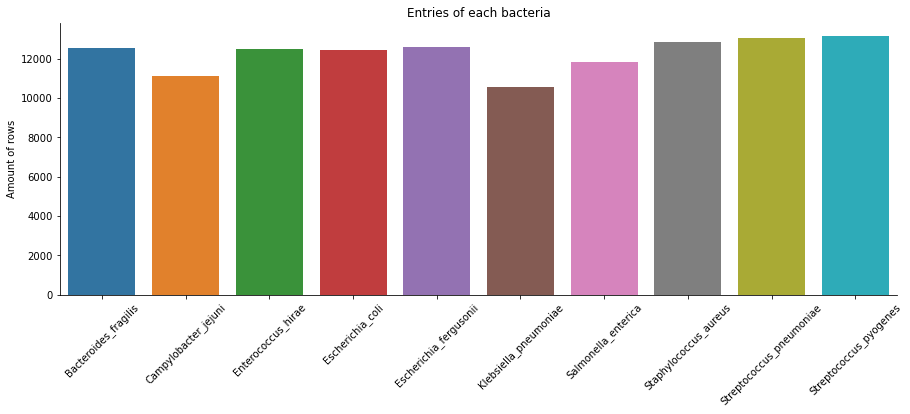

In [17]:
x_axis= train_df.groupby('target')['target'].count().index
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=x_axis, y=train_df.groupby('target')['target'].count())
ax.set_title('Entries of each bacteria')
ax.set_xticklabels(x_axis, rotation=45)
ax.set_ylabel('Amount of rows')
ax.set(xlabel=None)
sns.despine()
plt.show()

Las diez bacterias tienen cantidad similar de entradas, por lo que considero que está balanceado y puedo utilizar los datos como están

### LabelEncoder para convertir el target a numérico

In [18]:
la = LabelEncoder()
train_df['target'] = la.fit_transform(train_df['target'])

In [19]:
train_df.target

row_id
1         6
2         6
3         6
5         3
7         1
         ..
199994    7
199995    6
199996    9
199997    8
199999    5
Name: target, Length: 122623, dtype: int32

### Cardinality of features

In [20]:
feature_distinct_values = train_df.iloc[:,:-1].nunique(axis=0, dropna=True).sort_values().to_frame(name='distinct_values')
feature_distinct_values = feature_distinct_values.reset_index().rename(columns={'index':'sequence'})

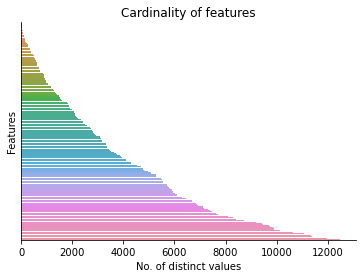

In [21]:
sns.barplot(y=feature_distinct_values['sequence'], x=feature_distinct_values['distinct_values'])
plt.yticks([])
plt.title('Cardinality of features')
plt.xlabel('No. of distinct values')
plt.ylabel('Features')
sns.despine()

Hay mucha variación entre la cantidad de valores únicos de las features. Quizás se pueden separar las features con pocos valores distintos y tratar como categóricas

### Correlación

In [22]:
features = train_df.iloc[:, :-1]
features_corr = features.corr()

([], [])

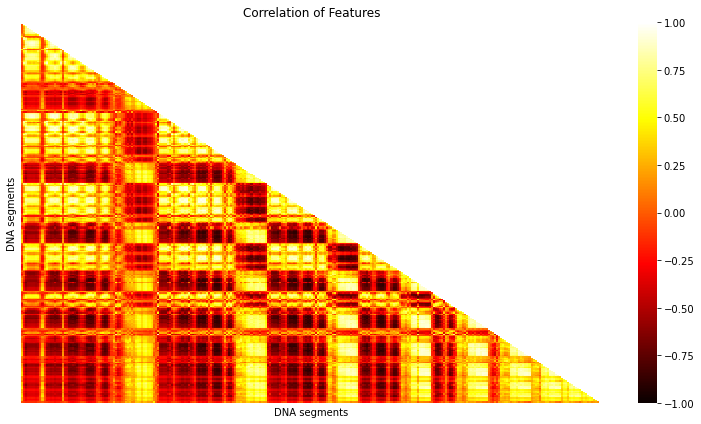

In [23]:
mask = np.triu(np.ones_like(features_corr, dtype=bool), k=0) 
plt.figure(figsize=(13,7))
sns.heatmap(features_corr, mask = mask, cmap='hot', vmin=-1, vmax=+1)
plt.title('Correlation of Features')
plt.xlabel('DNA segments')
plt.ylabel('DNA segments')
plt.xticks([])
plt.yticks([])

Se observan algunas features que tienen bastante correlación. Junto y ordeno para ver cuales. Tendría que verlo antes de eliminar todos los "outliers"

In [24]:
sorted_feature_corr = features_corr.mask(mask).stack().sort_values()
sorted_feature_corr

A6T2G1C1  A2T2G4C2   -0.911067
A4T3G2C1  A2T1G3C4   -0.906021
A5T2G2C1  A2T2G3C3   -0.905269
A5T3G1C1  A2T2G4C2   -0.905098
          A3T1G3C3   -0.903429
                        ...   
A1T1G5C3  A1T1G4C4    0.950539
A1T0G5C4  A0T1G4C5    0.953098
A2T0G4C4  A1T1G4C4    0.953915
A2T1G4C3  A1T2G4C3    0.964679
A2T1G3C4  A1T2G3C4    0.968521
Length: 40755, dtype: float64

Con estas correlaciones, podría reducir dimensionalidad eliminando algunas de las altamente correlacionadas

### distplot de todas las features
Cambié de histplot a kde y se observan mucho mejor los gráficos, aunque le falta un poco de optimización. Se puede observar que las diferentes features varían bastante en sus distribuciones de datos (incluso se puede ver las que tienen poca cardinalidad)

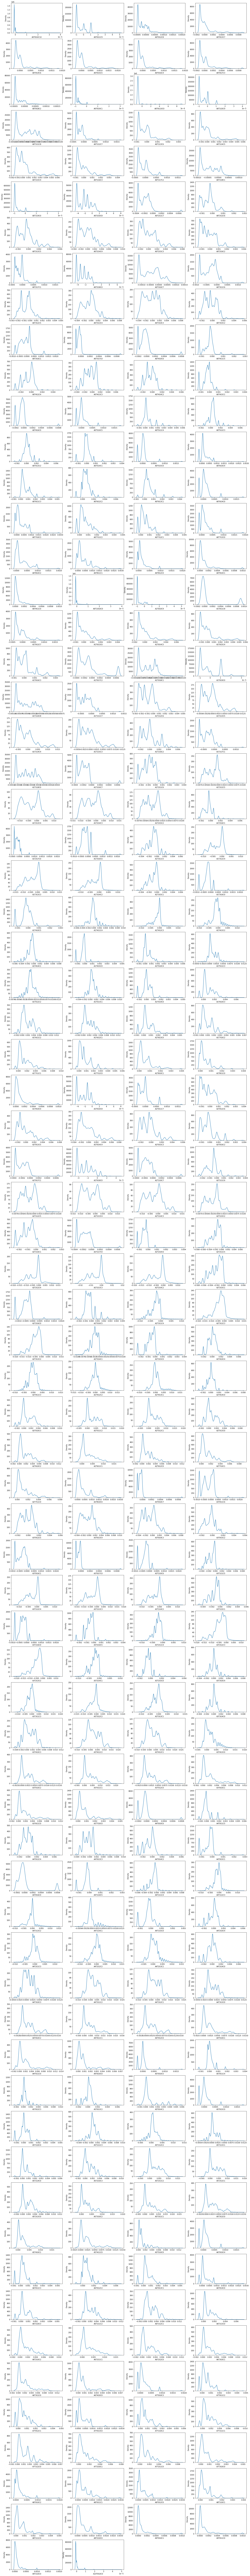

In [40]:
col = train_df.columns
plt.figure(figsize = (25,280))
for i in range (len(col)-1):
    plt.subplot(72, 4, i+1)
    # sns.histplot(train_df[col[i]])
    sns.kdeplot(train_df[col[i]])


## Modelados

Podría usar un Scaler, pero como todas las columnas tienen valores "similares" y cercanos a 0, decidí modelar sin escalarlo. Con más tiempo analizaría esta opción más a prfundidad.

### Importación de librerías

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

### Separación de entrenamiento, validación y las labels

In [27]:
x_train, x_val = train_test_split(train_df, test_size=0.2)
print(f'train shape: {x_train.shape}')
print(f'validation shape: {x_val.shape}')
y_train = x_train.pop('target')
y_val = x_val.pop('target')
print(f'new train shape: {x_train.shape}')
print(f'new validation shape: {x_val.shape}')

train shape: (98098, 287)
validation shape: (24525, 287)
new train shape: (98098, 286)
new validation shape: (24525, 286)


### Regresión logística

In [28]:
# lr = LogisticRegression(solver='saga')
# lr.fit(x_train, y_train)
# train_pred = lr.predict(x_train)
# val_pred = lr.predict(x_val) 
# accuracy_score(y_train, train_pred), accuracy_score(y_val, val_pred)

In [29]:
# print('train data:')
# print(classification_report(y_train, train_pred))
# print('-----------------------------------------------------')
# print('test data:')
# print(classification_report(y_val, val_pred))

### naive-Bayes

In [30]:
# gnb = GaussianNB()
# pred_train = gnb.fit(x_train, y_train).predict(x_train)
# pred_val = gnb.predict(x_val)
# print("Number of mislabeled points out of a total %d points : %d"
# % (x_val.shape[0], (y_val != pred_val).sum()))

In [31]:
# accuracy_score(y_train, pred_train), accuracy_score(y_val, val_pred)

In [32]:
# print('train data:')
# print(classification_report(y_train, pred_train))
# print('-----------------------------------------------------')
# print('test data:')
# print(classification_report(y_val, pred_val))

### Random Forest Classifier

In [33]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1)
pred_train = rfc.fit(x_train, y_train).predict(x_train)
pred_val = rfc.predict(x_val)
print("Number of mislabeled points out of a total %d points : %d"
% (x_val.shape[0], (y_val != pred_val).sum()))

Number of mislabeled points out of a total 24525 points : 239


In [34]:
accuracy_score(y_train, pred_train), accuracy_score(y_val, pred_val)

(0.994332198413831, 0.9902548419979612)

In [35]:
print('train data:')
print(classification_report(y_train, pred_train))
print('-----------------------------------------------------')
print('test data:')
print(classification_report(y_val, pred_val))

train data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10022
           1       1.00      0.98      0.99      8919
           2       1.00      0.98      0.99     10059
           3       1.00      1.00      1.00      9921
           4       1.00      1.00      1.00     10090
           5       1.00      1.00      1.00      8463
           6       1.00      1.00      1.00      9515
           7       0.99      0.99      0.99     10229
           8       0.99      0.99      0.99     10354
           9       0.97      1.00      0.98     10526

    accuracy                           0.99     98098
   macro avg       0.99      0.99      0.99     98098
weighted avg       0.99      0.99      0.99     98098

-----------------------------------------------------
test data:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2522
           1       1.00      0.97      0.99      2219
 

### Predicción del test_df con el modelo elegido

In [36]:
pred_test = rfc.predict(test_df)

In [37]:
predictions = la.inverse_transform(pred_test)
predictions

array(['Escherichia_fergusonii', 'Salmonella_enterica',
       'Enterococcus_hirae', ..., 'Escherichia_fergusonii',
       'Staphylococcus_aureus', 'Streptococcus_pyogenes'], dtype=object)

In [38]:
output = pd.DataFrame({'row_id': test_df.index, 'target': predictions})
output.to_csv('datasets/2022_02/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [42]:
# !kaggle competitions submit -c tabular-playground-series-feb-2022 -f datasets/2022_02/submission.csv -m "6(late) - RandomForestClassifier, more estimators and depth"

Primer intento con Logistic regression con parámetros predeterminado y sólo descartando filas de entrenamiento con z-score>3: Score 0.57738

Segundo intento con Logistic regression con solver='lbfgs', max_iter=1000 y sólo descartando filas de entrenamiento con z-score>3: Score 0.57878

Tercer intento con Logistic regression con solver='saga' y sólo descartando filas de entrenamiento con z-score>3: Score 0.57723

*LogisticRegression tal como está no es un buen fit, pero considero esto la base para las soluciones más optimizadas.*
*Creo que randomForest puede ser un buen segundo intento*

Cuarto intento con RandomForestClassifier: Score: 0.61558

No pude hacer la otra con más estimadores, porque por error envié 3 veces la misma anterior. Al ser el último día, no podré hacer el submit

**Conslusión**: No llegué a hacer mucho análisis porque tenía tres días solamente. Con más tiempos, analizaría mejor los gráficos individuales de cada feature para ver situaciones llamativas y analizar mejor esos casos.

Si hacía eso podría haber hecho el análisis sin descartar de una todos los outliers, ya que esto tiene varios conflictos:
- Como no estoy eliminando la misma proporción de todos los targets, esto puede significar que esos outliers son parámetros diferenciadores relevantes para esas bacterias. 
- Se borraron demasiados datos, con lo cual podría no haber borrado la fila entera, sino sólo esos datos y reemplazarlos por la mediana/media (lo mejor sería del target correspondiente, pero en test no sabría ese dato).
- Esta forma hizo imposible que pudiera realizarlo en el test_df, ya que terminaría no prediciendo esas filas